<a href="https://colab.research.google.com/github/Gabrielle-Ribeiro/kaggle-survey-2020/blob/main/Kaggle_Machine_Learning_and_Data_Science_Survey_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kaggle Machine Learning and Data Science Survey 2020

The Kaggle Machine Learning and Data Science Survey presents a truly comprehensive view of the state of data science and machine learning. The survey was live for 3.5 weeks in October, 2020. 

We presents in this notebook a few insights about the perfil of the people who answered the survey, the salaries in the field and best ways for new data scientists to break into the field.

The survey questions can be found [here](https://github.com/Gabrielle-Ribeiro/kaggle-survey-2020/blob/main/kaggle_survey_2020_answer_choices.pdf).

## Import the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Taking a look in the data

In [2]:
df = pd.read_csv('kaggle_survey_2020_responses.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9,Q7_Part_10,Q7_Part_11,Q7_Part_12,Q7_OTHER,Q8,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_4,Q9_Part_5,Q9_Part_6,Q9_Part_7,Q9_Part_8,Q9_Part_9,Q9_Part_10,Q9_Part_11,Q9_OTHER,Q10_Part_1,Q10_Part_2,Q10_Part_3,Q10_Part_4,Q10_Part_5,Q10_Part_6,Q10_Part_7,...,Q31_B_Part_7,Q31_B_Part_8,Q31_B_Part_9,Q31_B_Part_10,Q31_B_Part_11,Q31_B_Part_12,Q31_B_Part_13,Q31_B_Part_14,Q31_B_OTHER,Q33_B_Part_1,Q33_B_Part_2,Q33_B_Part_3,Q33_B_Part_4,Q33_B_Part_5,Q33_B_Part_6,Q33_B_Part_7,Q33_B_OTHER,Q34_B_Part_1,Q34_B_Part_2,Q34_B_Part_3,Q34_B_Part_4,Q34_B_Part_5,Q34_B_Part_6,Q34_B_Part_7,Q34_B_Part_8,Q34_B_Part_9,Q34_B_Part_10,Q34_B_Part_11,Q34_B_OTHER,Q35_B_Part_1,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming language would you recommend ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following hosted notebook product...,Which of the following hosted notebook product...,Which of the following hosted notebook product...,Which of the following hosted notebook product...,Which of the following hosted notebook product...,Which of the following hosted notebook product...,Which of the following hosted notebook product...,...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which specific automated machine learning tool...,Which specific automated machine learning tool...,Which specific automated machine learning tool...,Which specific automated machine learning tool...,Which specific automated machine learning tool...,Which specific automated machine learning tool.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20037 entries, 0 to 20036
Columns: 355 entries, Time from Start to Finish (seconds) to Q35_B_OTHER
dtypes: object(355)
memory usage: 54.3+ MB


Before we can get started with the visualization and analysis, let's drop the first line of our dataframe, because it contains only the survey questions.

In [5]:
df = df.drop(index=0, axis=0)

Let's create a function that we are goint to use to display values in the graph's bars.

In [6]:
def display_bar_values(ax, orientation):
  if orientation == 'v':
    for p in ax.patches:
      ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', fontsize=8)
  else:
    for p in ax.patches:
      ax.annotate("%.2f" % p.get_width(), (p.get_width(), p.get_y() + p.get_height() / 2.),
                 va='center', fontsize=8)

## General Look

First of all, let's understand who are the people that answer the survey, by seeing the general information about them.

### How many users answer the survey?

In [7]:
print(str(len(df)) + ' users.')

20036 users.


### What is the age of the people that answer the survey?

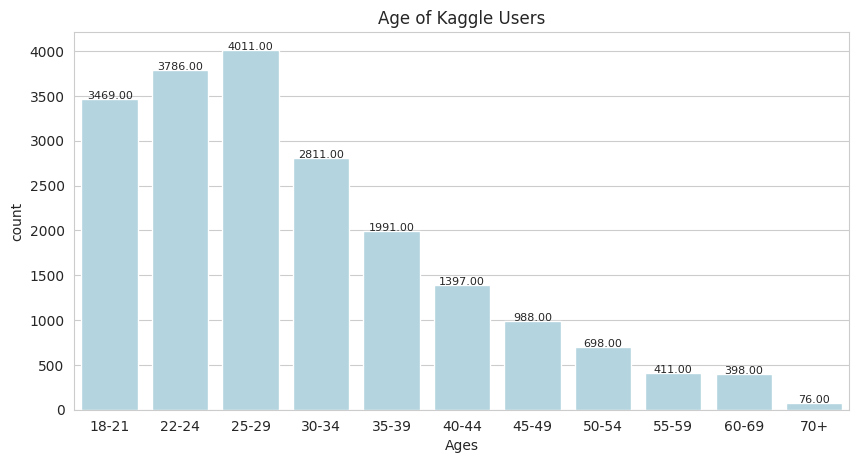

In [11]:
plt.figure(figsize=(10,5), dpi=100)

sns.set_style('whitegrid')
ax = sns.countplot(data=df.sort_values('Q1'), x='Q1', color='lightblue')
plt.title('Age of Kaggle Users')
plt.xlabel('Ages')

display_bar_values(ax, 'v')

plt.show()

In [15]:
(3469 + 3786 + 4011) * 100 / 20036

56.22878818127371

Kaggle users are young people. The age range that concetrates most people is between 18 and 29 years. About 56% of the users are in this range.

### What is the gender of the people that answer the survey?

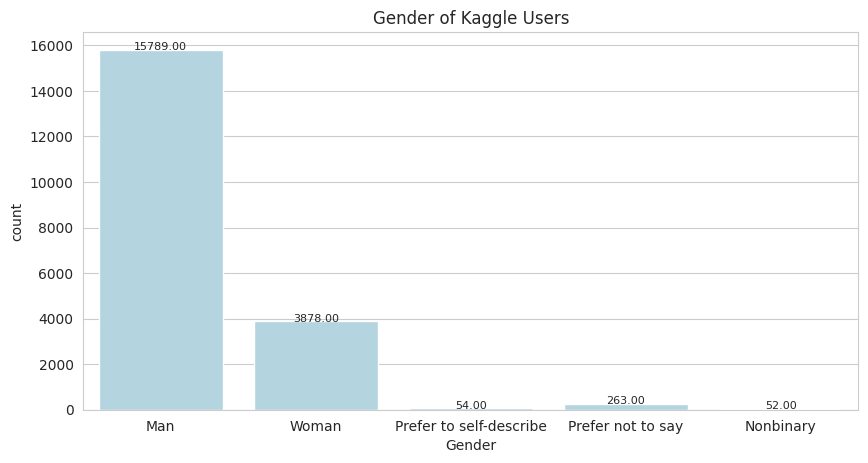

In [13]:
plt.figure(figsize=(10,5), dpi=100)

ax = sns.countplot(data=df, x='Q2', color='lightblue')

plt.title('Gender of Kaggle Users')
plt.xlabel('Gender')

display_bar_values(ax, 'v')

plt.show()

In [16]:
15789 * 100 / 20036

78.80315432222001

Unfortunatelly, the same reality of STEM (Science, Technology, Engineering and Mathematics) is seeing here. We have a few women and others groups. Most users are man, they represent 78,8% of the users that answered the survey.

### In which country do the Kaggle users live?

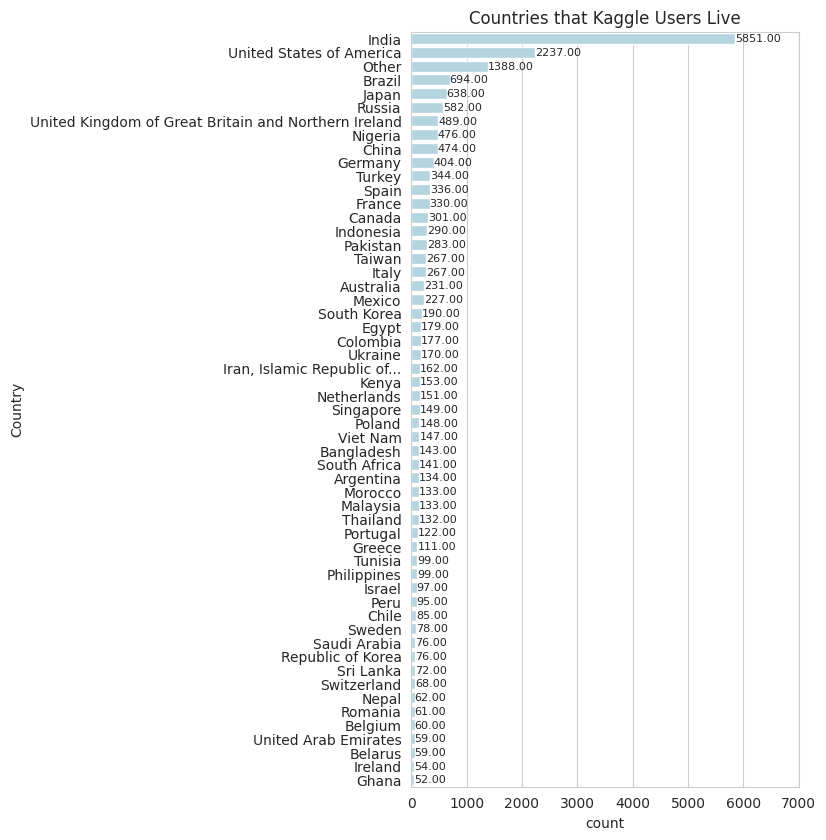

In [14]:
plt.figure(figsize=(5,10), dpi=100)

ax = sns.countplot(data=df, y='Q3', 
              order=df['Q3'].value_counts().index,
              color='lightblue')

plt.title('Countries that Kaggle Users Live')
plt.ylabel('Country')

display_bar_values(ax, 'h')
    
plt.xlim(0, 7000)

plt.show()

In [20]:
5851 * 100 / 20036

29.202435615891396

We can see that Kaggle users are spread all over the world.             
The countries that have more Kaggle users are India, United States of America and Brazil.     
 About 29% Kaggle users are from India.

### What is the highest level of education of Kaggle users?

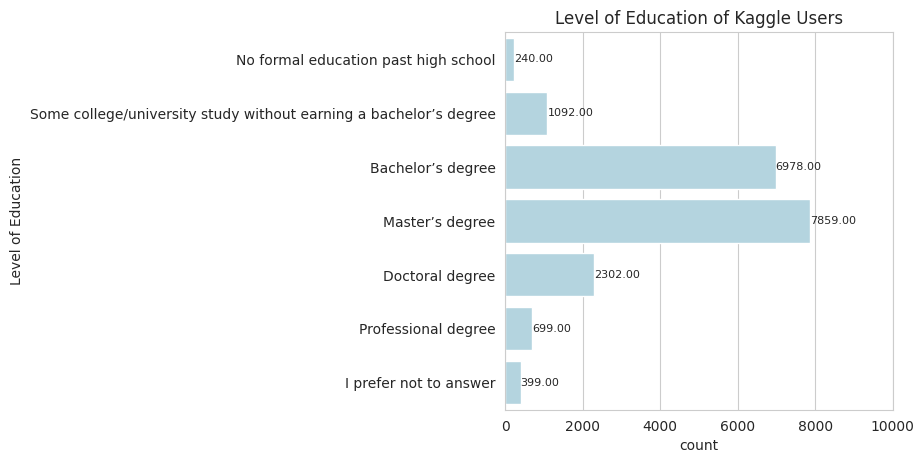

In [17]:
plt.figure(figsize=(5,5), dpi=100)

ax = sns.countplot(data=df, y='Q4', 
              order=['No formal education past high school',
                     'Some college/university study without earning a bachelor’s degree',
                     'Bachelor’s degree',
                     'Master’s degree',
                     'Doctoral degree',
                     'Professional degree',
                     'I prefer not to answer'],
              color='lightblue')

plt.title('Level of Education of Kaggle Users')
plt.ylabel('Level of Education')

display_bar_values(ax, 'h')
    
plt.xlim(0, 10000)

plt.show()

In [18]:
7859 * 100 / 20036

39.224396087043324

In [19]:
6978 * 100 / 20036

34.82731084048712

As expected from a academical environment, most Kaggle users has a Master's degree, or at least a Bachelor's degree. About 39% of Kaggle users have a Master's degree and 34% have a Bachelor's degree.

Let's also take a look in the distribution of genders in the level of education of Kaggle users.

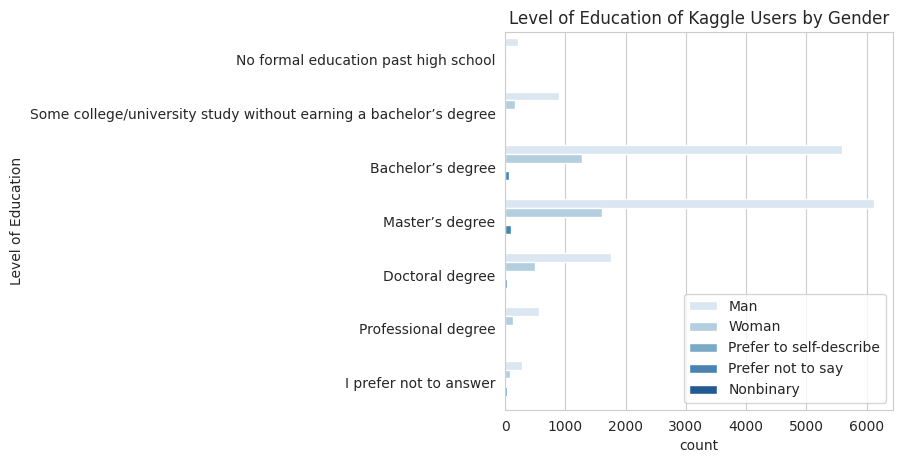

In [22]:
plt.figure(figsize=(5,5), dpi=100)

sns.countplot(data=df, y='Q4', 
              order=['No formal education past high school',
                     'Some college/university study without earning a bachelor’s degree',
                     'Bachelor’s degree',
                     'Master’s degree',
                     'Doctoral degree',
                     'Professional degree',
                     'I prefer not to answer'],
              palette='Blues', hue='Q2')

plt.title('Level of Education of Kaggle Users by Gender')
plt.ylabel('Level of Education')

plt.legend()

plt.show()

Seems that women have at least somo college/university study without earning a bachelor's degree.

### What is the current title job from Kaggle users?

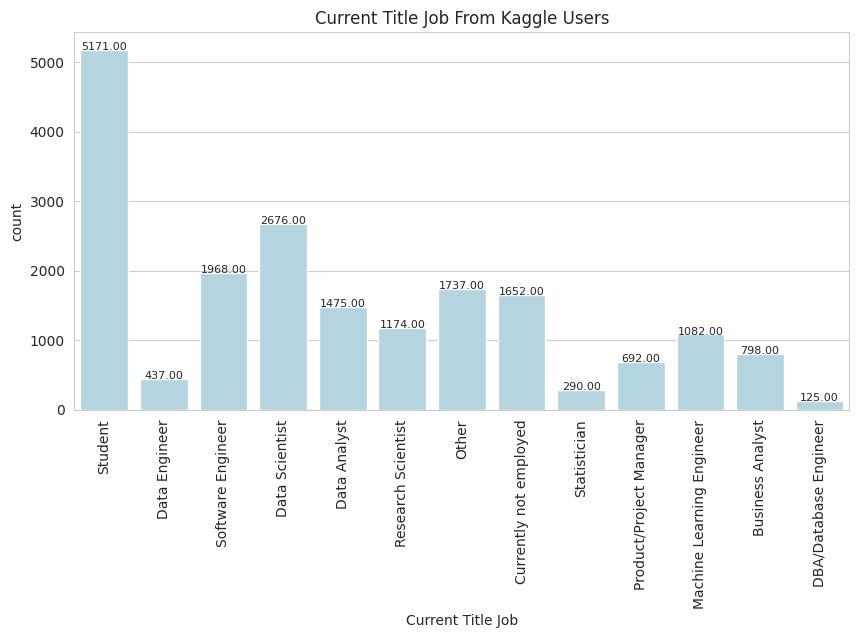

In [24]:
plt.figure(figsize=(10,5), dpi=100)

ax = sns.countplot(data=df, x='Q5', color='lightblue')

plt.title('Current Title Job From Kaggle Users')
plt.xlabel('Current Title Job')

display_bar_values(ax, 'v')

plt.xticks(rotation=90)

plt.show()

In [26]:
5171 * 100 / 20036

25.808544619684568

Most Kaggle users are students, followed by data scientists and software engineers. The students represent 25% of users. 

Let's take a look in the gender distribution on the different job titles.

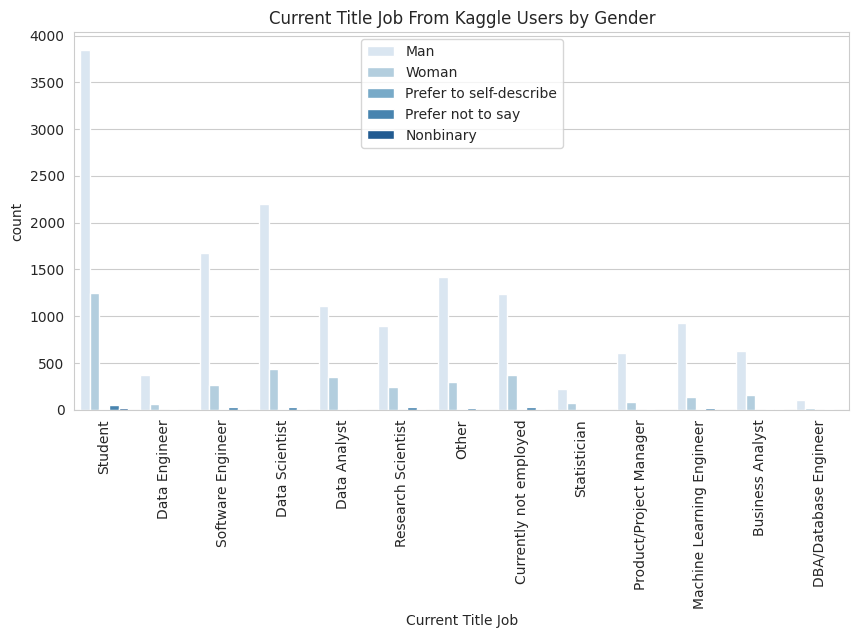

In [25]:
plt.figure(figsize=(10,5), dpi=100)
sns.countplot(data=df, x='Q5', palette='Blues', hue='Q2')

plt.title('Current Title Job From Kaggle Users by Gender')
plt.xlabel('Current Title Job')

plt.xticks(rotation=90)

plt.legend()

plt.show()

Seems like men and women are both present in the different roles.

### For how many years Kaggle users have been writing code?

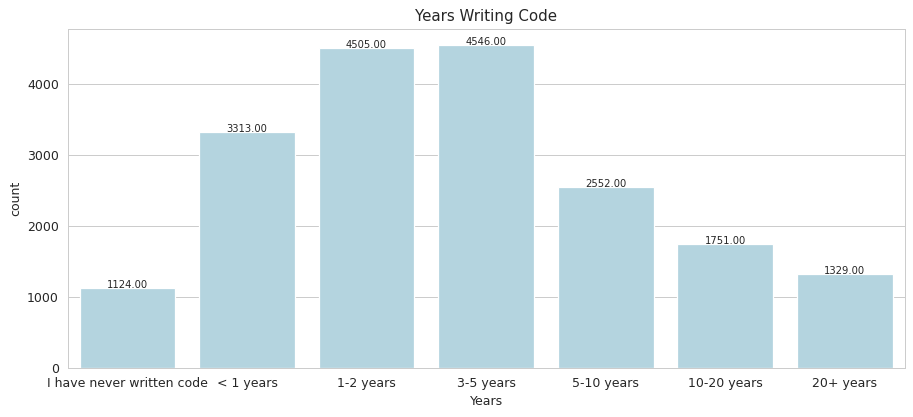

In [28]:
plt.figure(figsize=(12,5), dpi=90)

ax = sns.countplot(data=df, x='Q6',
              order=['I have never written code',
                     '< 1 years',
                     '1-2 years',
                     '3-5 years',
                     '5-10 years',
                     '10-20 years',
                     '20+ years'],
              color='lightblue')

plt.title('Years Writing Code')
plt.xlabel('Years')

display_bar_values(ax, 'v')

plt.show()

In [29]:
(4505 + 4546) * 100 / 20036

45.17368736274705

A huge part of the community do not program for a long time. Most Kaggle users, about 45%, have been writing code for 1-5 years. But it is expected since the number of young users. 

### For how many years have Kaggle users used machine learning methods?  

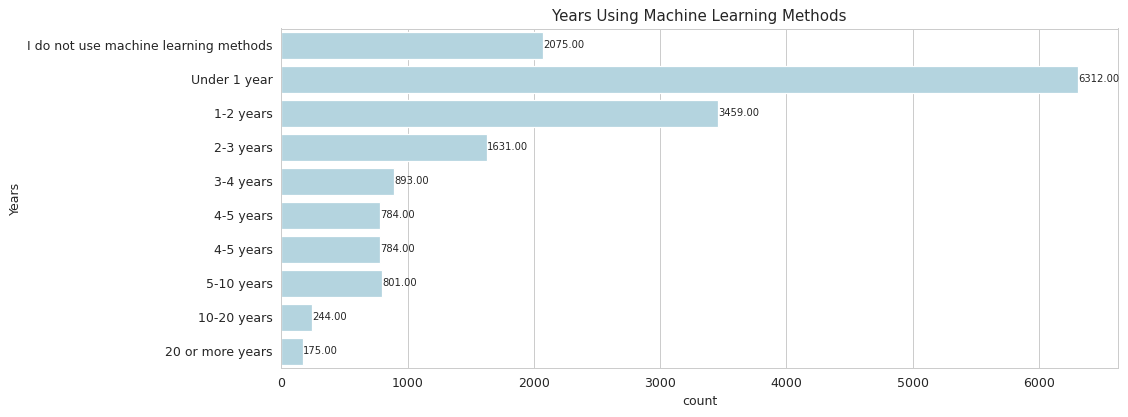

In [31]:
plt.figure(figsize=(12,5), dpi=90)

ax = sns.countplot(data=df, y='Q15',
                   order=['I do not use machine learning methods',
                          'Under 1 year',
                          '1-2 years',
                          '2-3 years',
                          '3-4 years',
                          '4-5 years',
                          '4-5 years',
                          '5-10 years',
                          '10-20 years',
                          '20 or more years'],
                   color='lightblue')

plt.title('Years Using Machine Learning Methods')
plt.ylabel('Years')

display_bar_values(ax, 'h')

plt.show()

In [33]:
6312 * 100 / 20036

31.50329407067279

In [34]:
175 * 100 / 20036

0.8734278299061689

Seems that most Kaggle users use machine learning techniques for less than a year. About 31% of them.     
Only 0.87% users use machine learning techniques for 20 years or more.
But make sense that most users are recent in the field, given that the big boom in this area is quite recently. 


## Programming languages and other tools used by Kaggle users

### What programming languages do Kaggle users use on a regular basis?

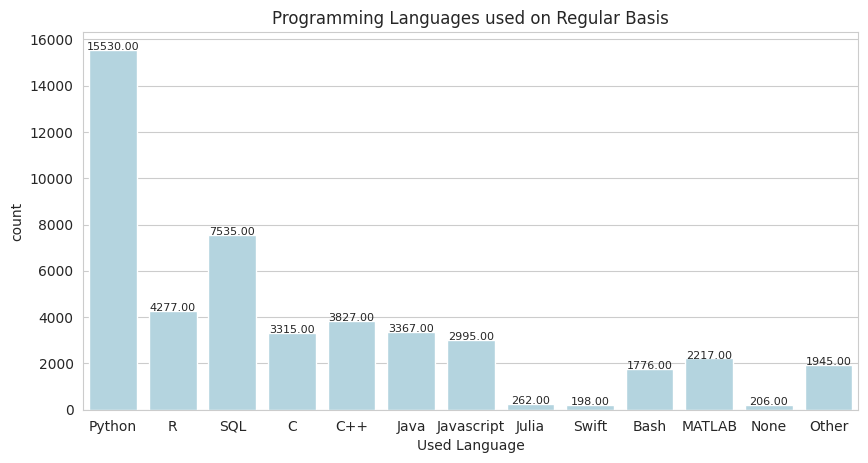

In [32]:
df_regular_basis = df.loc[:, 'Q7_Part_1': 'Q7_OTHER']

X = ['Python', 'R', 'SQL', 'C', 'C++', 'Java', 'Javascript', 'Julia', 'Swift',
     'Bash', 'MATLAB', 'None', 'Other']
y = df_regular_basis.count().values

plt.figure(figsize=(10,5), dpi=100)

ax = sns.barplot(x=X, y=y, color='lightblue')
display_bar_values(ax, 'v')

plt.title('Programming Languages used on Regular Basis')
plt.xlabel('Used Language')
plt.ylabel('count')
    
plt.show()

The most used programming languages are Python, SQL and R.

### Which integrated development environments (IDE's) do Kaggle users use on a regular basis?

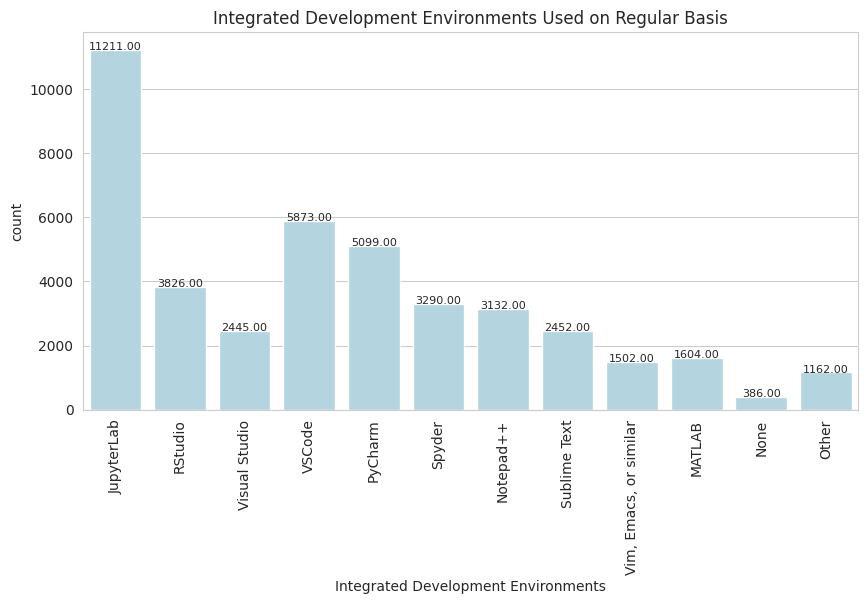

In [36]:
df_ide = df.loc[:, 'Q9_Part_1':'Q9_OTHER']

X = ['JupyterLab', 'RStudio', 'Visual Studio', 'VSCode', 'PyCharm', 'Spyder', 
     'Notepad++', 'Sublime Text', 'Vim, Emacs, or similar', 'MATLAB', 'None',
     'Other']
y = df_ide.count().values

plt.figure(figsize=(10,5), dpi=100)

ax = sns.barplot(x=X, y=y, color='lightblue')
display_bar_values(ax, 'v')

plt.title('Integrated Development Environments Used on Regular Basis')
plt.xlabel('Integrated Development Environments')
plt.ylabel('count')

plt.xticks(rotation=90)
    
plt.show()

The most used IDE's are JupyterLab, VSCode and PyCharm. 

### What data visualization libraries or tools do Kaggle users use on a regular basis?

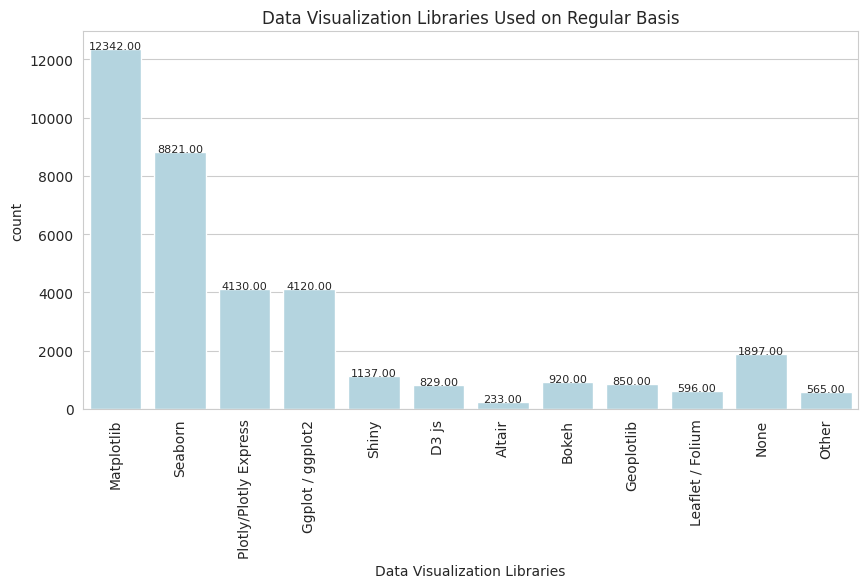

In [37]:
df_datavis = df.loc[:, 'Q14_Part_1':'Q14_OTHER']

X = ["Matplotlib", "Seaborn", "Plotly/Plotly Express", "Ggplot / ggplot2", 
     "Shiny", "D3 js", "Altair", "Bokeh", "Geoplotlib", "Leaflet / Folium", 
     "None", "Other"]
y = df_datavis.count().values

plt.figure(figsize=(10,5), dpi=100)

ax = sns.barplot(x=X, y=y, color='lightblue')
display_bar_values(ax, 'v')

plt.title('Data Visualization Libraries Used on Regular Basis')
plt.xlabel('Data Visualization Libraries')
plt.ylabel('count')

plt.xticks(rotation=90)
    
plt.show()

The most used Data Visualization Libraries are Matplotlib, Seaborn and Plotly/Plotly Express.

### Which machine learning frameworks do Kaggle users use on a regular basis?

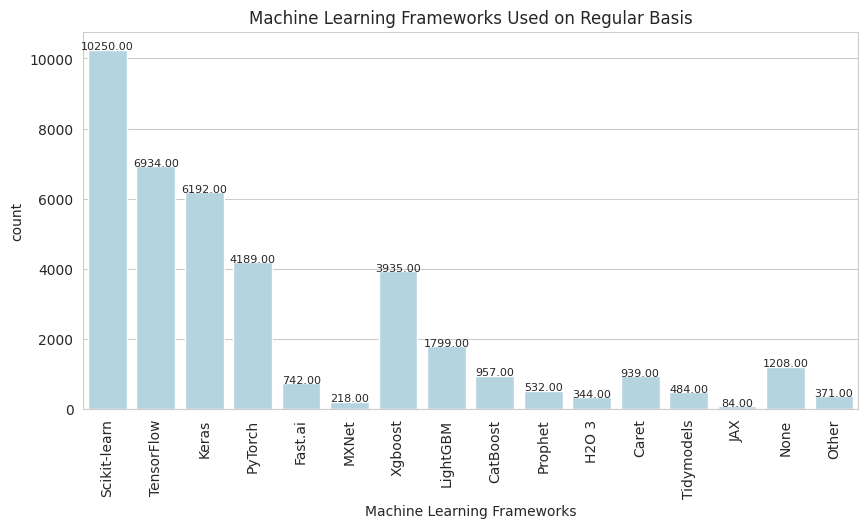

In [38]:
df_ml_frameworks = df.loc[:, 'Q16_Part_1':'Q16_OTHER']

X = ['Scikit-learn', 'TensorFlow', 'Keras', 'PyTorch', 'Fast.ai', 'MXNet', 
     'Xgboost', 'LightGBM', 'CatBoost', 'Prophet', 'H2O 3', 'Caret', 
     'Tidymodels', 'JAX', 'None', 'Other']
y = df_ml_frameworks.count().values

plt.figure(figsize=(10,5), dpi=100)

ax = sns.barplot(x=X, y=y, color='lightblue')
display_bar_values(ax, 'v')

plt.title('Machine Learning Frameworks Used on Regular Basis')
plt.xlabel('Machine Learning Frameworks')
plt.ylabel('count')

plt.xticks(rotation=90)
    
plt.show()

The most used Machine Learning Frameworks are Scikit-learn, TensorFlow and Keras.

## A little bit about salary

First, we need to separate who is actually employed from the others.


In [39]:
df_currently_employed = df[(df['Q5'] != 'Student') & 
                           (df['Q5'] != 'Currently not employed')]

Then, we take only the columns with the current role and the salary range. We also need to drop any row that contains null values.

In [40]:
df_employed_salary = df_currently_employed[['Q5','Q24']].dropna(axis=0, 
                                                                how='any')

In [41]:
df_employed_salary.head()

,Q5,Q24
2,Data Engineer,"100,000-124,999"
3,Software Engineer,"15,000-19,999"
4,Data Scientist,"125,000-149,999"
9,Data Scientist,"70,000-79,999"
12,Research Scientist,"30,000-39,999"


Let's transform the salary ranges, so we can have few values.

In [42]:
df_employed_salary = df_employed_salary.replace(['$0-999', '1,000-1,999', '2,000-2,999', '3,000-3,999', '4,000-4,999'], '$0-4,999')
df_employed_salary = df_employed_salary.replace(['5,000-7,499', '7,500-9,999'], '$5,000-9,999')
df_employed_salary = df_employed_salary.replace(['10,000-14,999', '15,000-19,999', '20,000-24,999'], '$10,000-24,999')
df_employed_salary = df_employed_salary.replace(['25,000-29,999', '30,000-39,999', '40,000-49,999'], '$25,000-49,999')
df_employed_salary = df_employed_salary.replace(['50,000-59,999', '70,000-79,999'], '$50,000-79,999')
df_employed_salary = df_employed_salary.replace(['80,000-89,999', '90,000-99,999'], '$80,000-99,999')
df_employed_salary = df_employed_salary.replace(['100,000-124,999', '125,000-149,999'], '$100,000-149,999')
df_employed_salary = df_employed_salary.replace(['150,000-199,999', '200,000-249,999'], '$150,000-249,999')
df_employed_salary = df_employed_salary.replace('250,000-299,999', '$250,000-299,999')
df_employed_salary = df_employed_salary.replace('300,000-500,000', '$300,000-500,000')

In [43]:
df_employed_salary.head()

,Q5,Q24
2,Data Engineer,"$100,000-149,999"
3,Software Engineer,"$10,000-24,999"
4,Data Scientist,"$100,000-149,999"
9,Data Scientist,"$50,000-79,999"
12,Research Scientist,"$25,000-49,999"


Now we transform the categories of the salary column into a hot encoded dataframe.

In [44]:
df_salary_hot_encode = pd.get_dummies(df_employed_salary['Q24'])

In [46]:
df_salary_hot_encode.head()

,"$0-4,999","$10,000-24,999","$100,000-149,999","$150,000-249,999","$25,000-49,999","$250,000-299,999","$300,000-500,000","$5,000-9,999","$50,000-79,999","$80,000-99,999","60,000-69,999","> $500,000"
2,0,0,1,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,1,0,0,0
12,0,0,0,0,1,0,0,0,0,0,0,0


Let's create a new dataframe with the current role and the hot encoded dataframe.

In [47]:
df_employed = pd.merge(df_employed_salary['Q5'], df_salary_hot_encode, 
                       how='inner', on=df_salary_hot_encode.index)
df_employed = df_employed.drop('key_0', axis=1)

In [48]:
df_employed.head()

,Q5,"$0-4,999","$10,000-24,999","$100,000-149,999","$150,000-249,999","$25,000-49,999","$250,000-299,999","$300,000-500,000","$5,000-9,999","$50,000-79,999","$80,000-99,999","60,000-69,999","> $500,000"
0,Data Engineer,0,0,1,0,0,0,0,0,0,0,0,0
1,Software Engineer,0,1,0,0,0,0,0,0,0,0,0,0
2,Data Scientist,0,0,1,0,0,0,0,0,0,0,0,0
3,Data Scientist,0,0,0,0,0,0,0,0,1,0,0,0
4,Research Scientist,0,0,0,0,1,0,0,0,0,0,0,0


We group the rows that have the same job role.

In [52]:
df_employed = df_employed.groupby('Q5').sum()

In [53]:
df_employed

,"$0-4,999","$10,000-24,999","$100,000-149,999","$150,000-249,999","$25,000-49,999","$250,000-299,999","$300,000-500,000","$5,000-9,999","$50,000-79,999","$80,000-99,999","60,000-69,999","> $500,000"
Q5,,,,,,,,,,,,
Business Analyst,194.0,110.0,51.0,15.0,102.0,0.0,3.0,70.0,62.0,36.0,33.0,2.0
DBA/Database Engineer,33.0,20.0,13.0,1.0,17.0,0.0,0.0,7.0,9.0,6.0,4.0,2.0
Data Analyst,509.0,189.0,67.0,13.0,154.0,0.0,1.0,124.0,98.0,61.0,43.0,1.0
Data Engineer,90.0,54.0,42.0,14.0,56.0,1.0,2.0,29.0,38.0,24.0,18.0,1.0
Data Scientist,686.0,319.0,274.0,151.0,336.0,8.0,17.0,140.0,204.0,161.0,89.0,13.0
Machine Learning Engineer,424.0,100.0,61.0,47.0,104.0,5.0,5.0,66.0,50.0,29.0,25.0,2.0
Other,471.0,218.0,120.0,69.0,193.0,14.0,13.0,147.0,132.0,63.0,61.0,7.0
Product/Project Manager,127.0,78.0,83.0,44.0,82.0,5.0,4.0,30.0,64.0,39.0,32.0,2.0
Research Scientist,361.0,139.0,73.0,49.0,135.0,5.0,1.0,68.0,105.0,43.0,38.0,11.0


Let's organize the order of the salary ranges to a ascending order.

In [55]:
df_employed = df_employed[['$0-4,999', '$5,000-9,999', '$10,000-24,999',
                          '$25,000-49,999', '$50,000-79,999', '$80,000-99,999',
                          '$100,000-149,999', '$150,000-249,999', 
                          '$250,000-299,999', '$300,000-500,000', '> $500,000']]

In [56]:
df_employed.head()

,"$0-4,999","$5,000-9,999","$10,000-24,999","$25,000-49,999","$50,000-79,999","$80,000-99,999","$100,000-149,999","$150,000-249,999","$250,000-299,999","$300,000-500,000","> $500,000"
Q5,,,,,,,,,,,
Business Analyst,194.0,70.0,110.0,102.0,62.0,36.0,51.0,15.0,0.0,3.0,2.0
DBA/Database Engineer,33.0,7.0,20.0,17.0,9.0,6.0,13.0,1.0,0.0,0.0,2.0
Data Analyst,509.0,124.0,189.0,154.0,98.0,61.0,67.0,13.0,0.0,1.0,1.0
Data Engineer,90.0,29.0,54.0,56.0,38.0,24.0,42.0,14.0,1.0,2.0,1.0
Data Scientist,686.0,140.0,319.0,336.0,204.0,161.0,274.0,151.0,8.0,17.0,13.0


Now, we can see how many users in each anual salary range we have by each current role.

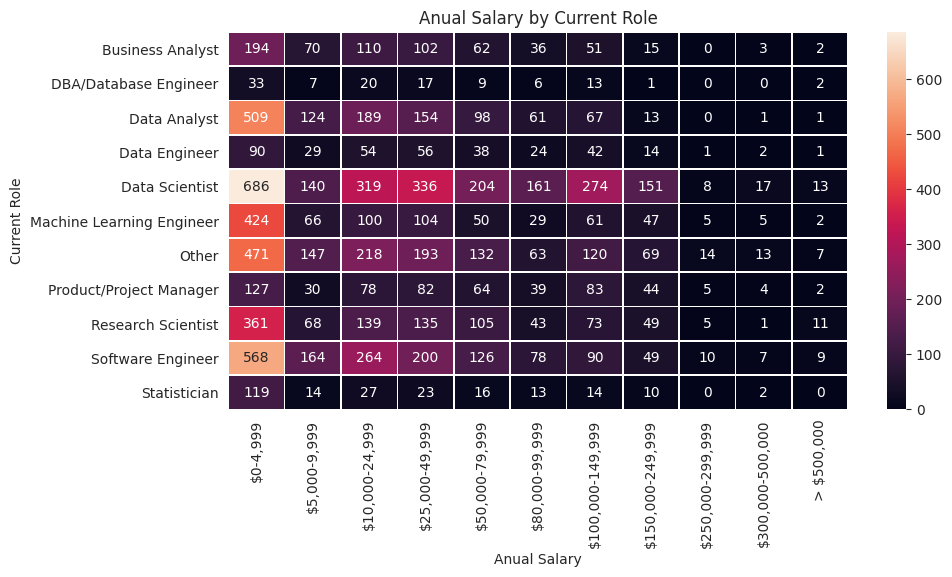

In [57]:
plt.figure(figsize=(10,5), dpi=100)

sns.heatmap(df_employed, linewidth=0.5, annot=True, fmt='g')

plt.title('Anual Salary by Current Role')
plt.ylabel('Current Role')
plt.xlabel('Anual Salary')
plt.show()

## I don't know how to get started into Data Science... An overview about what steps you could take next.

### What programming language would Kaggle users recommend an aspiring data scientist to learn first?

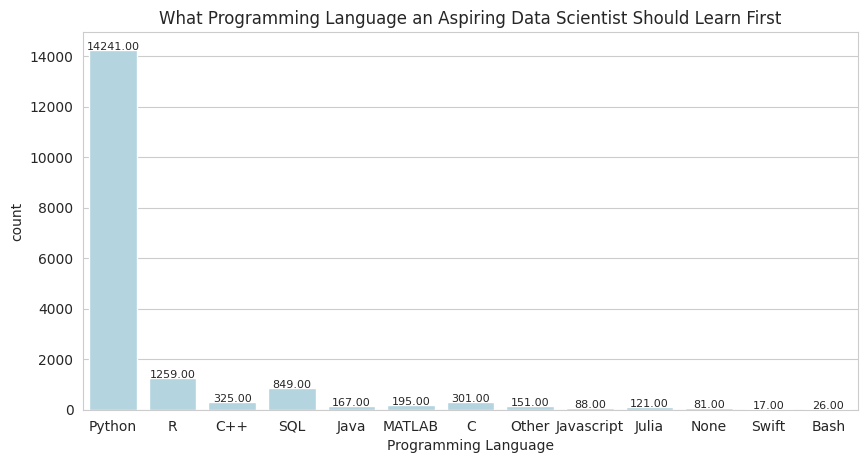

In [60]:
plt.figure(figsize=(10,5), dpi=100)

ax = sns.countplot(data=df, x='Q8', color='lightblue')
display_bar_values(ax, 'v')

plt.title('What Programming Language an Aspiring Data Scientist Should Learn First')
plt.xlabel('Programming Language')
plt.show()

In [61]:
14241 * 100 / 20036

71.07706128967858

About 71% of the users that answered the survey, said that Python is the programming language that an aspiring data scientist should learn first.

### On which platforms have Kaggle users begun or completed data science courses? 

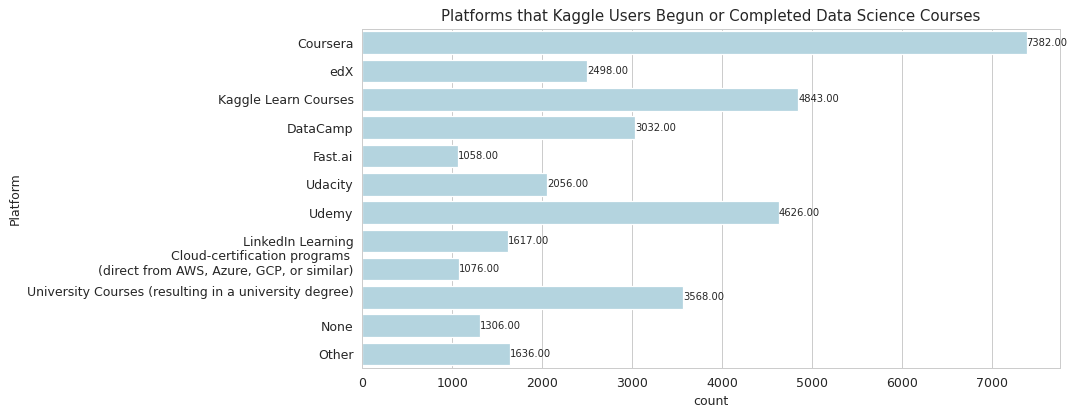

In [74]:
df_platforms = df.loc[:, 'Q37_Part_1':'Q37_OTHER']

y = ['Coursera', 'edX', 'Kaggle Learn Courses', 'DataCamp', 'Fast.ai', 
     'Udacity', 'Udemy', 'LinkedIn Learning',
     'Cloud-certification programs \n(direct from AWS, Azure, GCP, or similar)\n', 
     'University Courses (resulting in a university degree)\n', 'None', 'Other']
X = df_platforms.count().values

plt.figure(figsize=(10,5), dpi=90)

ax = sns.barplot(x=X, y=y, color='lightblue')
display_bar_values(ax, 'h')

plt.title('Platforms that Kaggle Users Begun or Completed Data Science Courses')
plt.xlabel('count')
plt.ylabel('Platform')

plt.show()

Seems that the most used platform for data science courses is Coursera.

### Who/what are your favorite media sources that report on data science topics? 

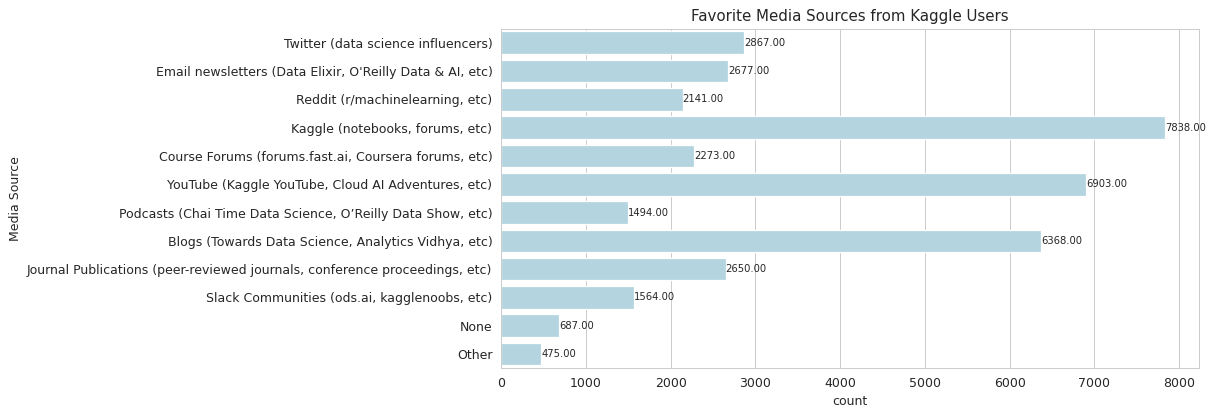

In [73]:
df_platforms = df.loc[:, 'Q39_Part_1':'Q39_OTHER']

y = ['Twitter (data science influencers)', 
     "Email newsletters (Data Elixir, O'Reilly Data & AI, etc)",
     'Reddit (r/machinelearning, etc)', 'Kaggle (notebooks, forums, etc)',
     'Course Forums (forums.fast.ai, Coursera forums, etc)', 
     'YouTube (Kaggle YouTube, Cloud AI Adventures, etc)',
     'Podcasts (Chai Time Data Science, O’Reilly Data Show, etc)',
     'Blogs (Towards Data Science, Analytics Vidhya, etc)',
     'Journal Publications (peer-reviewed journals, conference proceedings, etc)',
     'Slack Communities (ods.ai, kagglenoobs, etc)', 'None', 'Other']
X = df_platforms.count().values

plt.figure(figsize=(10,5), dpi=90)

ax = sns.barplot(x=X, y=y, color='lightblue')
display_bar_values(ax, 'h')

plt.title('Favorite Media Sources from Kaggle Users')
plt.xlabel('count')
plt.ylabel('Media Source')


plt.show()

The favorite media sources are Kaggle, Youtube and Blogs.